### Introduction

As part of the Udacity Nanodegree course, we had to pick a dataset, use the CRISP-DM framework, and answer some business questions. <br>

For this project, I selected the Stack Overflow 2023 survey, specifically focusing on the AI section. Last year saw more than 90,000 respondents filling in the questionaire. The dataset can be accessed [here](https://survey.stackoverflow.co/). <br>

Given the growing influence of AI in many fields, I aimed to explore software developers' views on AI advancements, their motivations for using AI, and the most popular AI tools they employ.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

### Data Understanding

In [2]:
df = pd.read_csv('survey_results_public.csv')

In [3]:
df_schema = pd.read_csv('survey_results_schema.csv')

In [4]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [5]:
df_schema.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID310,Q310,"<div><span style=""font-size:19px;""><strong>You...",False,DB,TB
3,QID312,Q120,,True,MC,SAVR
4,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB


___

### Business Understanding
<B> Based on the data seen above, we will try to answer the following questions: <B>
1. How favorable is your stance on using AI tools as part of your development workflow?
2. For the AI tools you use as part of your development workflow, what are the MOST important benefits you are hoping to achieve? Please check all that apply.
3. Which AI-powered search tools did you use regularly over the past year, and which do you want to work with over the next year? Select all that apply.

___

### Data Preparation and Data Modeling

In [11]:
'''' 

Data Preparation Steps:
Data Cleaning: No effort was required in cleaining the data since the data is clean
Missing Values: Missing values or N/A is expected in the survey as respondents might choose not to answer 
few questions. Hence, fillna function was used to handle nulls in such cases.

'''''

def clean_data(df, column_name):
    """Clean the data by converting non-string values to empty strings and converting to lower case."""
    df[column_name] = df[column_name].astype(str).fillna('').str.lower()
    return df

def count_occurrences(df, column_name, resources):
    """Count the occurrences of each resource in the specified column of the DataFrame."""
    resource_counts = {resource: 0 for resource in resources}
    resources_lower = [resource.lower() for resource in resources]

    for item in df[column_name]:
        for resource, resource_lower in zip(resources, resources_lower):
            if resource_lower in item:
                resource_counts[resource] += 1

    counts_df = pd.DataFrame(list(resource_counts.items()), columns=["Resource", "Count"])
    counts_df = counts_df.sort_values(by="Count", ascending=True)
    total_count = counts_df["Count"].sum()
    counts_df["Percentage"] = counts_df["Count"] / total_count * 100
    return counts_df

def plot_data(counts_df, title):
    """Plot the data using a horizontal bar chart."""
    bar_height = 0.6
    bar_color = (69/255, 110/255, 176/255)
    font_color = (125/255, 126/255, 128/255)

    plt.figure(figsize=(7, 5))
    bars = plt.barh(counts_df["Resource"], counts_df["Count"], height=bar_height, color=bar_color, edgecolor=None)
    plt.title(title, color=font_color)

    def k_formatter(x, pos):
        return f'{int(x / 1000)}k'

    formatter = FuncFormatter(k_formatter)
    plt.gca().xaxis.set_major_formatter(formatter)

    for bar, percentage in zip(bars, counts_df["Percentage"]):
        width = bar.get_width()
        plt.gca().text(width - 5, bar.get_y() + bar.get_height() / 2, f'{percentage:.1f}%', ha='left', va='center', color=font_color)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_color((0.66, 0.66, 0.66))
    plt.gca().xaxis.set_ticks([])
    plt.gca().yaxis.set_ticks_position('none')
    plt.tight_layout()
    plt.show()

SyntaxError: unterminated string literal (detected at line 1) (35280980.py, line 1)

### Evaluation

### How favorable is your stance on using AI tools as part of your development workflow?

- Very favorable
- Favorable
- Indifferent
- Unfavorable
- Very unfavorable
- Unsure

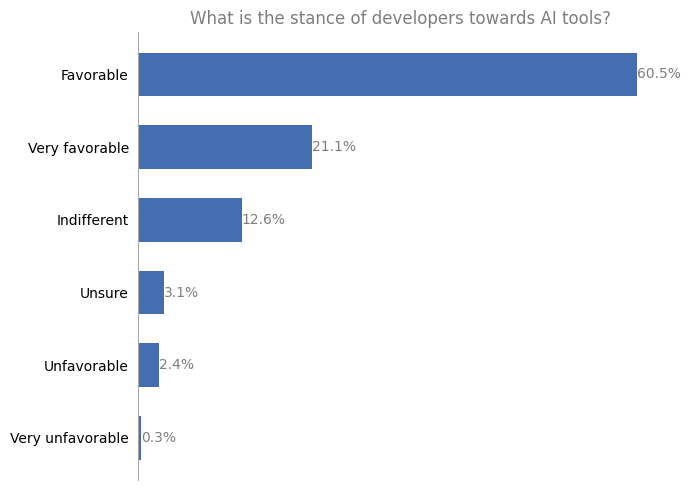

In [8]:
# First Plot
resources_sent = [
    "Very favorable",
    "Favorable",
    "Indifferent",
    "Unfavorable",
    "Very unfavorable",
    "Unsure"
]

df = clean_data(df, "AISent")
counts_df_sent = count_occurrences(df, "AISent", resources_sent)
plot_data(counts_df_sent, 'What is the stance of developers towards AI tools?')

### For the AI tools you use as part of your development workflow, what are the MOST important benefits you are hoping to achieve? Please check all that apply.

- Increase productivity <br>
- Greater efficiency <br>
- Improve collaboration <br>
- Speed up learning <br>
- Improve accuracy in coding <br>
- None of the above <br>

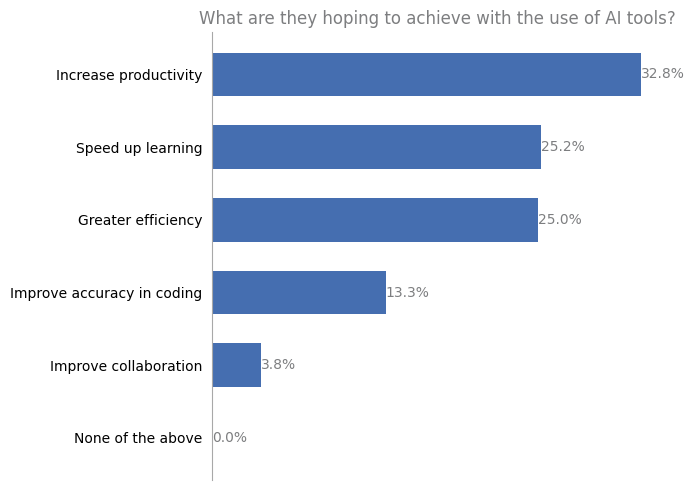

In [9]:
# Second Plot
resources_acc = [ 
    "Increase productivity",
    "Greater efficiency",
    "Improve collaboration",
    "Speed up learning",
    "Improve accuracy in coding",
    "None of the above"
]

df = clean_data(df, "AIAcc")
counts_df_acc = count_occurrences(df, "AIAcc", resources_acc)
plot_data(counts_df_acc, 'What are they hoping to achieve with the use of AI tools?')


### Which AI-powered search tools did you use regularly over the past year, and which do you want to work with over the next year? Select all that apply.

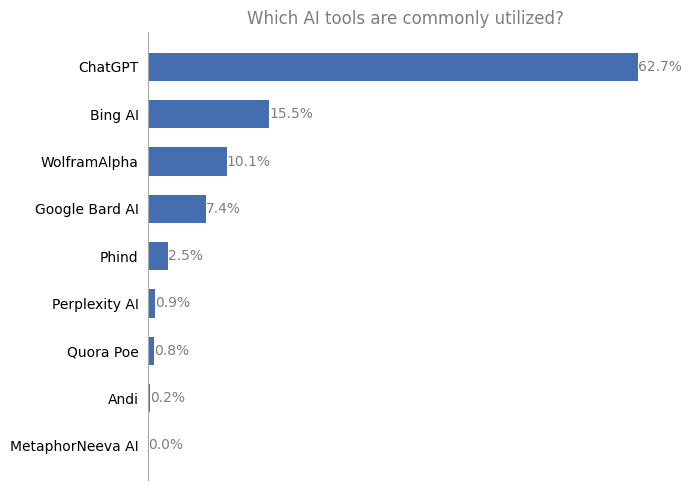

In [11]:
# Third Plot
resources_search = [ 
    "Andi",
    "Bing AI",
    "ChatGPT",
    "Google Bard AI",
    "Metaphor"
    "Neeva AI",
    "Perplexity AI",
    "Phind",
    "Quora Poe",
    "WolframAlpha"
]

df = clean_data(df, "AISearchHaveWorkedWith")
counts_df_search = count_occurrences(df, "AISearchHaveWorkedWith", resources_search)
plot_data(counts_df_search, 'Which AI tools are commonly utilized?')


### Conclusion

To wrap up the analysis, despite the initial negativity surrounding job loss among software developers, they actually favor AI tools to assist them in their work. These tools according to them help improve productivity, facilitate learning, and, surprisingly, enhance their coding skills.